# Exercise set 12


> In this exercise, we will process signals, and you will learn how you
can remove noise, obtain numerical derivatives of noisy signals, and
correct near-infrared spectra by removing unwanted scattering effects.

## Exercise 12.1

In this exercise, we will test the Savitzky–Golay filter for smoothing
and numerical differentiation. We will use a test signal which has been generated
from the following analytical function,

\begin{equation}
y(t) = \sin (8t) - 1.8t^2 + 0.5t^3.
\label{eq:signal}
\tag{8}\end{equation}

The signal is available in the file [`Data/signal.txt`](Data/signal.txt).
In addition, we will investigate a test signal generated from the same
analytical function but with noise added. This signal is available in the file
[`Data/signal_noise.txt`](Data/signal_noise.txt).

In `scipy`, a Savitzky–Golay filter can be created by using
the method `savgol_filter` from [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html).
An example is given below:

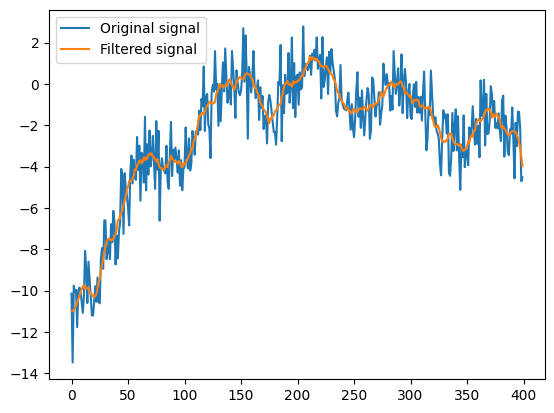

In [25]:
import numpy as np
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

signal = np.loadtxt("Data/signal_noise.txt")[:, 1]  # Load signal.
# Apply a Savitzky-Golay filter, length 21 and polynomial order of 3
smooth = savgol_filter(signal, 21, polyorder=3)
# Plot the original signal and the filtered one.
plt.plot(signal, label="Original signal")
plt.plot(smooth, label="Filtered signal")
plt.legend()
plt.show()

### 12.1(a)
Consider first the signal without the noise and apply a
Savitzky&ndash;Golay smoothing filter to it. Here you can experiment
with the window size and polynomial order, for instance, a window size of $5$
or $7$ and a polynomial order of $3$ or $5$.

**Is the signal visibly modified by the filter you are using?**

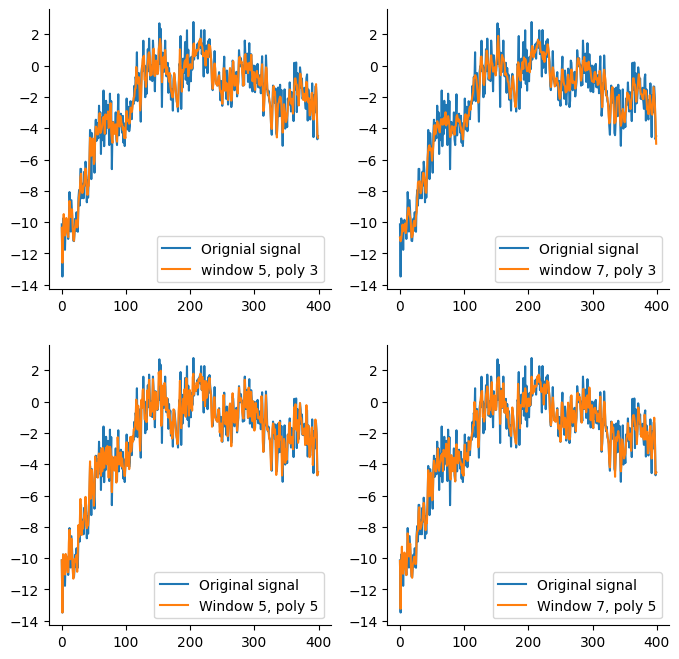

In [45]:
# Your code here
win_5_pol_3 = savgol_filter(signal, window_length=5, polyorder=3)
win_7_pol_3 = savgol_filter(signal, window_length=7, polyorder=3)
win_5_pol_5 = savgol_filter(signal, window_length=6, polyorder=5) # polyorder must be less than window size, cant be equal?
win_7_pol_5 = savgol_filter(signal, window_length=7, polyorder=5)

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize = (8,8))

ax1.plot(signal, label = "Orignial signal")
ax1.plot(win_5_pol_3, label = "window 5, poly 3")
ax1.legend()

ax2.plot(signal, label = "Orignial signal")
ax2.plot(win_7_pol_3, label = "window 7, poly 3")
ax2.legend()

ax3.plot(signal, label = "Original signal")
ax3.plot(win_5_pol_5, label = "Window 5, poly 5")
ax3.legend()

ax4.plot(signal, label = "Original signal")
ax4.plot(win_7_pol_5, label = "Window 7, poly 5")
ax4.legend()

# for ax in fig.get_axes():
#     ax.label_outer()

sns.despine()

# a.plot(win_7_pol_5, label = "Window 7, poly 5")

### Your answer to question 12.1(a): Is the signal visibly modified by the filter you are using?

The filter affects the result, it seems that a larger window size combined with lower polynomial gives less noise

### 12.1(b)
Create a Savitzky&ndash;Golay filter for first-order differentiation with a
window size of $7$ and polynomial order of $3$. Apply this to the signal
without noise and compare the differentiated signal with the analytical
derivative of Eq. (8). 

Note: In order to obtain the derivative,
you will have to supply the spacing between your points using the
`delta` parameter of the `savgol_filter` method.
Further, you must tell the method to compute the derivative by
setting the parameter `deriv`  to the order of the derivative
you want. An example of this can be found below:

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt


data = np.loadtxt("Data/signal_noise.txt")  # Load signal.
x = data[:, 0]
delta_x = x[1] - x[0]  # Spacing between x-points
signal = data[:, 1]
# Apply a Savitzky-Golay filter, length 51 and polynomial order of 3,
# and obtain the first derivative:
deriv = savgol_filter(signal, 51, polyorder=3, delta=delta_x, deriv=1)
# Plot the original signal and the filtered one.
plt.plot(x, signal, label="Original signal")
plt.plot(x, deriv, label="Derivative of signal")
plt.legend()
plt.show()

In [ ]:
# Your code here

### Your answer to question 12.1(b):
*Double click here*

### 12.1(c)
Create a Savitzky&ndash;Golay filter for smoothing the signal *with* noise.
Here, you have to experiment with the window size to use. Use a polynomial
order of $3$, and compare your smoothed signal with the original signal and
the signal without noise.

In [ ]:
# Your code here

### Your answer to question 12.1(c):
*Double click here*

### 12.1(d)
Create a Savitzky&ndash;Golay filter for first-order differentiation of the signal
*with* noise. Here, you have to experiment with the window size to use.
Use a polynomial order of $3$ and compare your differentiated signal
with the analytical derivative of Eq. (8).

In [ ]:
# Your code here

### Your answer to question 12.1(d):
*Double click here*

## Exercise 12.2

In this exercise, we will smooth a signal by performing convolution.
We will attempt to smooth the signal given in Eq. (8)
with added noise (data file: [`Data/signal_noise.txt`](Data/signal_noise.txt)). A short example
of convolution with `scipy/numpy` can be found below:

In [ ]:
import numpy as np
from scipy.signal import windows
from matplotlib import pyplot as plt

%matplotlib notebook

signal = np.loadtxt("Data/signal_noise.txt")[:, 1]  # Load signal.
window = windows.boxcar(21)  # Create a rectangular window of 21 points
window /= window.sum()  # Normalize the window.
conv = np.convolve(signal, window, mode="same")  # Calculate convolution.
# Plot the original signal and the filtered one.
plt.plot(signal, label="Original signal")
plt.plot(conv, label="Filtered signal (convolution, rectangular)")
plt.legend()
plt.show()

### 12.2(a)
For smoothing the signal, we will use a windowing function for the convolution.
In the code above, we use a simple rectangular window for the smoothing,
but in `scipy`, there are several windowing functions
available.
A list of the available windowing
functions can be found [here](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) and
they behave differently.

Are you able to remove most of the noise from
the given signal? Experiment with different windowing functions and/or different
windowing lengths! 

In [ ]:
# Your code here

### Your answer to question 12.2(a): Could you remove the noise? What window did you use?
*Double click here*

## Exercise 12.3

You have measured the signal given in the file [`Data/spike.txt`](Data/spike.txt). Unfortunately, 
the signal contains a prominent spike you want to remove. In the code below,
we attempt to remove the spike by doing a convolution with
a rectangular window. Run this code and observe the results.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import windows

%matplotlib notebook


def median_filter(yvalues, width=11):
    """Apply a median filter to the given y-values."""
    medians = []
    half = width // 2
    length = len(yvalues) - 1
    for i, _ in enumerate(yvalues):
        left = max(0, i - half)
        right = min(length, i + half)
        med = np.median(yvalues[left : right + 1])
        medians.append(med)
    return np.array(medians)


signal = np.loadtxt("Data/spike.txt")
window = window = windows.boxcar(21)
window /= window.sum()
conv = np.convolve(signal, window, mode="same")  # Do convolution
filter_median = median_filter(signal, width=21)  # Apply median filter
# Plot the results:
fig, axes = plt.subplots(constrained_layout=True, ncols=2)
axes[0].plot(signal, label="Original signal")
axes[0].legend()
axes[1].plot(signal, alpha=0.5, label="Original signal")
axes[1].plot(conv, label="Signal after convolution")
axes[1].plot(filter_median, label="Signal after median filter")
# Zoom in around the spike:
axes[1].set_xlim(600, 950)
axes[1].set_ylim(0, 2)
axes[1].legend()
plt.show()

### 12.3(a)
As you can see from the results of applying the convolution, 
the spike has not been completely removed. Rather,
it has been made broader. Can you explain what seems to be
happening around the spike when you apply the convolution?

### Your answer to question 12.3(a):
*Double click here*

### 12.3(b)
The code given above also includes a so-called *median* filter.
The median filter
returns the median value of the signal in a given window. Applying
this filter does better job of removing the spike. Can you explain
why this is the case?

### Your answer to question 12.3(b):
*Double click here*

## Exercise 12.4

Multiplicative Scatter Correction (MSC) is one approach for removing non-linear
effects in near-infrared (NIR) spectra. Such effects may arise as a result
of scattering effects in a sample.
This will generate additional variance which is not related to the
chemical interesting information contained in the spectrum, and we would,
therefore, like to remove it.

The file [`Data/nir_msc.txt`](Data/nir_msc.txt) contains $222$ spectra
sampled at $121$ wavelengths. Each row contains a spectrum, and each
column represents a single wavelength. You will now apply MSC to
correct these spectra.

### 12.4(a)
Find a representative spectrum by taking the mean of the $222$ spectra.
We will refer to this representative spectrum as $f(x)$ in the following.

In [ ]:
# Your code here

### Your answer to question 12.4(a):
*Double click here*

### 12.4(b)
Correct each spectrum, $h_i(x)$, by first fitting it to a linear
equation,

\begin{equation}
h_i(x) = a_i f(x) + b_i ,
\end{equation}

and then remove the scattering effects by taking,

\begin{equation}
h_{i, \text{corrected}}(x) = \frac{h_i(x) -b_i}{a_i} .
\end{equation}

In [ ]:
# Your code here

### Your answer to question 12.4(b):
*Double click here*

### 12.4(c)
Plot the corrected and uncorrected spectra.
Does this look like what you would expect?

In [ ]:
# Your code here

### Your answer to question 12.4(c):
*Double click here*

### 12.4(d)
As stated above, MSC will remove some of the (presumably) uninteresting
variances. We can quantify this by calculating the sum of squares, $SS_0$,

\begin{equation}
SS_0 = \sum_i \sum_j (x_{ij} - \overline{x}_j)^2,
\end{equation}

where $x_{ij}$ is the absorbance for spectrum $i$ at wavelength $j$, and
$\overline{x}_j$ is the mean of all spectra for wavelength $j$.
Calculate $SS_0$ for both the corrected and uncorrected spectra.
Does MSC reduce $SS_0$ as we expect?

In [ ]:
# Your code here

### Your answer to question 12.4(d):
*Double click here*